<a href="https://colab.research.google.com/github/Helios109/Verylimitedtoystore/blob/main/2_Travel_agency_database_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 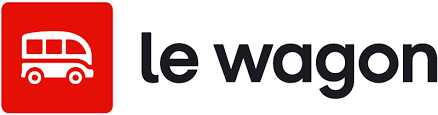

# Travel agency



Today, you are working at a travel agency. All the cities covered by this agency are stored in a Python dictionary.


They need your newly acquired Python skills to develop useful functions!

## Information for one city


The information pertaining to a city is provided in a single dictionary. Let's take a look at an example below.

Please note that:
- `location` corresponds to latitude and longitude
- `prefecture_level` is measured in km<sup>2</sup> (squared kilometers)

In [1]:
paris_city = {"name": "Paris",
              "total_population": 2102650,
              "continent": "Europe",
              "location": [48.8566, 2.3522],
              "area": {
                  "prefecture_level": 105.4
              }}

What is the data type of the value of `location`? What about `area`?


In [4]:
location_data_type = type(paris_city["location"])
print("Data type of 'location':", location_data_type)

area_data_type = type(paris_city["area"])
print("Data type of 'area':", area_data_type)

Data type of 'location': <class 'list'>
Data type of 'area': <class 'dict'>


How do we get the `prefecture_level` from `paris_city` ?




In [5]:
prefecture_level = paris_city["area"]["prefecture_level"]

print("Prefecture level of Paris:", prefecture_level)

Prefecture level of Paris: 105.4


How do we get the `longitude` from `paris_city` ?



In [6]:
longitude = paris_city["location"][1]

print("Longitude of Paris:", longitude)

Longitude of Paris: 2.3522


Create a function `get_key_value_from_city` that takes two arguments `city` and `key` and outputs the `key` value from the city.



__Eg__: `get_key_value_from_city(city=paris_city, key="total_population")` will output 2102650


<u>Note:</u> If a property doesn't exist, the function should return "_property_ not defined"
    





In [18]:
def get_key_value_from_city(city, key):

    if key in city:
        return city[key]
    else:
        print(f"Key '{key}' not found in the city dictionary.")
        return None

# Example usage:
paris_city = {
    "name": "Paris",
    "total_population": 2102650,
    "continent": "Europe",
    "location": [48.8566, 2.3522],
    "area": {
        "prefecture_level": 105.4
    }
}

# Get the total population of Paris
population = get_key_value_from_city(paris_city, "total_population")
print("Total population of Paris:", population)

# Get the longitude of Paris
longitude = get_key_value_from_city(paris_city, "location")[1]
print("Longitude of Paris:", longitude)

# Get the prefecture level of Paris
prefecture_level = get_key_value_from_city(paris_city, "area")["prefecture_level"]
print("Prefecture level of Paris:", prefecture_level)


Total population of Paris: 2102650
Longitude of Paris: 2.3522
Prefecture level of Paris: 105.4


## Information for all cities



The travel agency has collected multiple cities information where it manages accommodations. \
All of these cities are stored in a Python list called `cities`.

Execute the cell below to load data. How many cities do they have?

In [19]:
cities = [
    {
        "name": "Paris",
        "total_population": 2102650,
        "continent": "Europe",
        "location": [48.8566, 2.3522],
        "area": {
            "prefecture_level": 105.4
        }
    },
    {
        "name": "Xi’an",
        "total_population": 12328000,
        "continent": "Asia",
        "location": [34.2667, 108.9000],
        "area": {
            "prefecture_level": 10762
        }
    },
    {
        "name": "Chengdu",
        "total_population": 14645000,
        "continent": "Asia",
        "location": [30.6600, 104.0633],
        "area": {
            "prefecture_level": 14378
        }
    },
    {
        "name": "Los Angeles",
        "total_population": 12121244,
        "continent": "North America",
        "location": [34.1141, -118.4068],
        "area": {
            "prefecture_level": 1299
        }
    },
    {
        "name": "Brooklyn",
        "total_population": 2736074,
        "continent": "North America",
        "location": [40.6501, -73.9496],
        "area": {
            "prefecture_level": 180
        }
    }
]

In [21]:
num_cities = len(cities)

print("Number of cities:", num_cities)

Number of cities: 5


### Reading value



By utilizing your previous function `get_key_value_from_city` create a new one that will take two arguments: a `city_name` and a `key`.

If the city is not in the list, the function should return "*city* doesn't exist or is not covered".

Test your function with multiple examples.

In [22]:
# create the function with the selected arguments
def retrieve_city_key_value_database(city_name, key):

    # Set default output
    output = "city doesn't exist or is not covered"

    # Loop over cities
    for city in cities:
        if city["name"] == city_name:
            # If the city exists, use get_key_value_from_city function to retrieve the value
            value = get_key_value_from_city(city, key)
            if value is not None:
                output = value
            else:
                output = f"'{key}' key does not exist for {city_name}"
            break

    return output

# Test the function with examples
print(retrieve_city_key_value_database("Paris", "total_population"))  # Output: 2102650
print(retrieve_city_key_value_database("Los Angeles", "area"))        # Output: {'prefecture_level': 1299}
print(retrieve_city_key_value_database("Brooklyn", "continent"))      # Output: North America
print(retrieve_city_key_value_database("London", "total_population")) # Output: city doesn't exist or is not covered
print(retrieve_city_key_value_database("Chengdu", "mayor"))            # Output: 'mayor' key does not exist for Chengdu


2102650
{'prefecture_level': 1299}
North America
city doesn't exist or is not covered
Key 'mayor' not found in the city dictionary.
'mayor' key does not exist for Chengdu


### Update value


Sometimes, city information can be incorrect or require updates.

Create a `modify_city_key_value` function that replaces an existing key's value with a new one. \
It takes three arguments: a `city_name`, a `key` and a new`value` to assign to the key.

The function will generate a text message indicating one of the following scenarios:

- If the city doesn't exist or is not covered: "*city* doesn't exist or is not covered."
- If the provided key doesn't exist: "*key* doesn't exist."
- If the key has been successfully updated for the city: "*key* has been updated for *city*."

In [24]:
# create the function with the selected arguments
def modify_city_key_value(city_name, key, new_value):
    # Set default output
    output = "city doesn't exist or is not covered."

    # Loop over cities
    for city in cities:
        if city["name"] == city_name:
            # If the city exists, check if the key exists
            if key in city:
                # If the key exists, update its value
                city[key] = new_value
                output = f"{key} has been updated for {city_name}."
            else:
                # If the key doesn't exist, set the output message accordingly
                output = "key doesn't exist."
            break

    return output

# Test the function with examples
print(modify_city_key_value("Paris", "total_population", 2200000))  # Output: total_population has been updated for Paris.
print(modify_city_key_value("London", "total_population", 9000000))   # Output: city doesn't exist or is not covered.
print(modify_city_key_value("Xi’an", "mayor", "New Mayor"))          # Output: key doesn't exist.



total_population has been updated for Paris.
city doesn't exist or is not covered.
key doesn't exist.


## Search engine

It is quite common for customers to seek destinations that are not far from their current location in order to minimize transportation costs.


The travel agency requires your assistance in developing a function that can provide a list of nearby cities.

### Geopy


Execute the two cells below to see to observe how we can calculate the distance between two locations. \
Thanks to the [Geopy](https://geopy.readthedocs.io/en/stable/#) library,  this process is quite straightforward.

In [25]:
!pip install geopy
from geopy import distance

In [27]:
newport_ri = [41.49008, -71.312796]
cleveland_oh = [41.499498, -81.695391]

print(distance.distance(newport_ri, cleveland_oh).km)


866.4554329098685


What is the data type of `distance.distance(newport_ri, cleveland_oh)`?

In [28]:
from geopy import distance

newport_ri = [41.49008, -71.312796]
cleveland_oh = [41.499498, -81.695391]

distance_result = distance.distance(newport_ri, cleveland_oh)

distance_data_type = type(distance_result)
print("Data type of distance_result:", distance_data_type)


Data type of distance_result: <class 'geopy.distance.geodesic'>


<details>
    <summary>Answer 💡</summary>
    
It's a `geopy.distance.geodesic` object.
</details>

### Design the search engine


Create a function `get_cities_nearby` that takes two arguments:
- `customer_location`: a list of coordinates in the format [lat, long]


- `radius`: the threshold in km

And returns a `list of cities` located near the provided customer_location.

If no city has been found, the function should return an empty list.

You can use the city of Guangyan in China (coordinates [32.4355, 105.8436]) and a radius of 500km to test your function.

You should find that Xi'an and Chengdu are not very far...

In [30]:
from geopy import distance

def get_cities_nearby(customer_location, radius, cities):
    nearby_cities = []

    # Iterate through the list of cities
    for city in cities:
        city_location = city["location"]

        # Calculate the distance between the customer's location and the city's location
        dist_km = distance.distance(customer_location, city_location).km

        # Check if the distance is within the specified radius
        if dist_km <= radius:
            nearby_cities.append(city["name"])

    return nearby_cities

# List of cities with their coordinates
cities = [
    {
        "name": "Xi'an",
        "location": [34.2667, 108.9000]
    },
    {
        "name": "Chengdu",
        "location": [30.6600, 104.0633]
    },
    # Add more cities as needed
]

# Test the function with Guangyan's location and a radius of 500km
guangyan_location = [32.4355, 105.8436]
radius = 500  # in km

nearby_cities = get_cities_nearby(guangyan_location, radius, cities)
print("Cities near Guangyan within 500km radius:", nearby_cities)



Cities near Guangyan within 500km radius: ["Xi'an", 'Chengdu']


Congratulations ! 🎉 \
You now have a search function ready for the travel agents to use !